# Semi Deviation, VAR and CVAR

In [71]:
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2
# %matplotlib inline - if needed, should be loaded on the latest version of jupyter python

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
hfi = erk.get_hfi_returns()

In [73]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [74]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [75]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

# VaR and CVaR

We'll look at three different ways to compute Value At Risk

1. Historic VaR
2. Parametric Gaussian VaR
3. Modified (Cornish-Fisher) VaR

In [76]:
import numpy as np
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [77]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [78]:
from scipy.stats import norm

In [79]:
z = norm.ppf(0.05)
z

-1.6448536269514729

In [80]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

<AxesSubplot:title={'center':'Hedge Fund Indices: VaR at 5%'}>

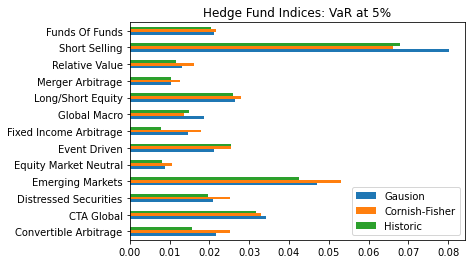

In [81]:
var_table = [erk.var_gaussian(hfi),
             erk.var_gaussian(hfi, modified=True),
             erk.var_historic(hfi)]
comparison = pd.concat(var_table, axis=1)
comparison.columns = ['Gausion', 'Cornish-Fisher', 'Historic']
comparison.plot.barh(title='Hedge Fund Indices: VaR at 5%')

In [85]:
erk.cvar_historic(hfi).sort_values(ascending=False)

Short Selling             0.096821
Emerging Markets          0.072364
Long/Short Equity         0.041943
CTA Global                0.041264
Event Driven              0.038336
Convertible Arbitrage     0.036550
Distressed Securities     0.036429
Funds Of Funds            0.033207
Fixed Income Arbitrage    0.028257
Relative Value            0.024650
Global Macro              0.020629
Merger Arbitrage          0.019143
Equity Market Neutral     0.016879
dtype: float64

In [86]:
erk.cvar_historic(hfi).sort_values(ascending=True)

Equity Market Neutral     0.016879
Merger Arbitrage          0.019143
Global Macro              0.020629
Relative Value            0.024650
Fixed Income Arbitrage    0.028257
Funds Of Funds            0.033207
Distressed Securities     0.036429
Convertible Arbitrage     0.036550
Event Driven              0.038336
CTA Global                0.041264
Long/Short Equity         0.041943
Emerging Markets          0.072364
Short Selling             0.096821
dtype: float64